In [30]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud

In [29]:
#pip install wordcloud

  Using cached wordcloud-1.9.2-cp310-cp310-win_amd64.whl (152 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\oc-SudharshanK\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\oc-
[nltk_data]    |     SudharshanK\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to C:\Users\oc-
[nltk_data]    |     SudharshanK\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to C:\Users\oc-
[nltk_data]    |     SudharshanK\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to C:\Users\oc-
[nltk_data]    |     SudharshanK\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to C:\Users\oc-
[nltk_data]    |     SudharshanK\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to C:\U

True

In [5]:
df=pd.read_excel('Group3-news-text-sanitized.xlsx')

In [6]:
df = df.drop_duplicates('Tweet',keep='first')
df['Tweet'].count()

10138

In [7]:
df["Cleaned_Tweet"] = [re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+", "", v.lower()) for v in df["Tweet"]]
df

,Category,Confidence,Tweet,Cleaned_Tweet
0,Not Relevant,1.0000,Hey! How are you?,hey how are you
1,Not Relevant,1.0000,What's up man?,whats up man
2,Not Relevant,1.0000,I love fruits,i love fruits
3,Not Relevant,1.0000,Summer is lovely,summer is lovely
4,Not Relevant,1.0000,My car is so fast,my car is so fast
...,...,...,...,...
10318,Relevant,0.3994,Make man pikin crash ??????,make man pikin crash
10319,Relevant,0.3994,Disregard my snap story there is an angry whit...,disregard my snap story there is an angry whit...
10320,Relevant,0.3982,#tornado #singapore Mac and #cheese #around th...,tornado singapore mac and cheese around the wo...
10321,Not Relevant,0.3367,Check out more data on Upper Wabash reservoirs...,check out more data on upper wabash reservoirs...


In [8]:
df.drop('Tweet',axis=1)

,Category,Confidence,Cleaned_Tweet
0,Not Relevant,1.0000,hey how are you
1,Not Relevant,1.0000,whats up man
2,Not Relevant,1.0000,i love fruits
3,Not Relevant,1.0000,summer is lovely
4,Not Relevant,1.0000,my car is so fast
...,...,...,...
10318,Relevant,0.3994,make man pikin crash
10319,Relevant,0.3994,disregard my snap story there is an angry whit...
10320,Relevant,0.3982,tornado singapore mac and cheese around the wo...
10321,Not Relevant,0.3367,check out more data on upper wabash reservoirs...


In [9]:
vals_to_replace = {'Relevant':1, 'Not Relevant':0}
df['Category'] = df['Category'].map(vals_to_replace)

In [10]:
df.dropna(inplace=True)

In [11]:
df['Category'].unique()

array([0., 1.])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Tweet'], df['Category'], test_size=0.2, random_state=42)

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [14]:
max_sequence_length = 100  
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

In [15]:
from keras.layers import Dense, Activation, Flatten,Dropout

In [16]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 32, input_length=max_sequence_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=32)

Epoch 1/5
254/254 [==============================] - 35s 116ms/step - loss: 0.5306 - accuracy: 0.7354 - val_loss: 0.4540 - val_accuracy: 0.8020
Epoch 2/5
254/254 [==============================] - 28s 110ms/step - loss: 0.3212 - accuracy: 0.8692 - val_loss: 0.4529 - val_accuracy: 0.8128
Epoch 3/5
254/254 [==============================] - 29s 113ms/step - loss: 0.2049 - accuracy: 0.9262 - val_loss: 0.5401 - val_accuracy: 0.7842
Epoch 4/5
254/254 [==============================] - 28s 110ms/step - loss: 0.1411 - accuracy: 0.9497 - val_loss: 0.5842 - val_accuracy: 0.7891
Epoch 5/5
254/254 [==============================] - 30s 116ms/step - loss: 0.1113 - accuracy: 0.9620 - val_loss: 0.6668 - val_accuracy: 0.7714


In [18]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

In [19]:
y_pred = model.predict(X_test_padded)
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

64/64 [==============================] - 3s 32ms/step
AUC: 0.8417441809204725


In [20]:
import matplotlib.pyplot as plt

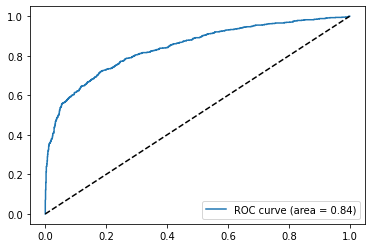

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()

In [22]:
model.save('your_model.h5')

C:\Users\oc-SudharshanK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from keras.models import load_model

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Cleaned_Tweet'])
model = load_model('your_model.h5')

In [25]:
def preprocess_text(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    return padded_sequence

In [26]:
input_text = "tornado"
input_data = preprocess_text(input_text)
predictions = model.predict(input_data)
predicted_label = np.argmax(predictions)
if predicted_label==0:
    print("Not relevant")
else:
    print("Relevant")

1/1 [==============================] - 1s 1s/step
Not relevant


In [64]:
# # Create Word Clouds
relevant_tweets = df.query("Category==1")["Cleaned_Tweet"].apply(str).str.cat(sep=' ')
not_relevant_tweets = df.query("Category==0")["Cleaned_Tweet"].apply(str).str.cat(sep=' ')

In [65]:
# Preprocess and generate word frequencies for relevant tweets
relevant_wordcloud = WordCloud().generate(relevant_tweets)


In [66]:

# Preprocess and generate word frequencies for not relevant tweets
not_relevant_wordcloud = WordCloud().generate(not_relevant_tweets)

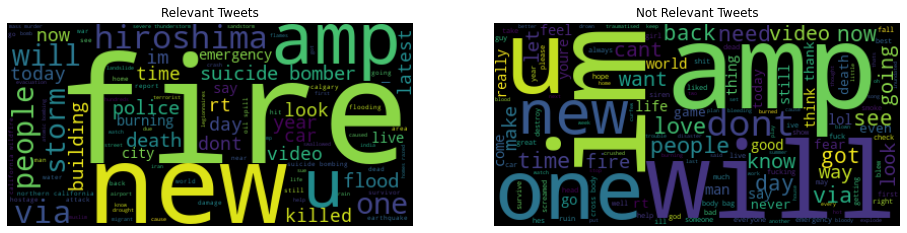

In [71]:
# Plot the word clouds
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(relevant_wordcloud, interpolation="bilinear")
plt.title("Relevant Tweets")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(not_relevant_wordcloud, interpolation="bilinear")
plt.title("Not Relevant Tweets")
plt.axis("off")
plt.show()